<a href="https://colab.research.google.com/github/vedoly/cadd-smart-systematic-literature-reviews/blob/main/cadd_smart_systematic_literature_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data**

##Download Data

In [ ]:
!gdown --id 15CyLhkOFnHIQhqmrjORRjQIgGdEelYHH

Downloading...
From: https://drive.google.com/uc?id=15CyLhkOFnHIQhqmrjORRjQIgGdEelYHH
To: /content/csv-drugdiscov-set.csv
100% 349k/349k [00:00<00:00, 3.02MB/s]


In [ ]:
filename = "csv-drugdiscov-set.csv"

import pandas as pd
df = pd.read_csv('csv-drugdiscov-set.csv')

In [ ]:
df.head(1)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,30976107,Applications of machine learning in drug disco...,"Vamathevan J, Clark D, Czodrowski P, Dunham I,...",Nat Rev Drug Discov. 2019 Jun;18(6):463-477. d...,Vamathevan J,Nat Rev Drug Discov,2019,2019/04/13,PMC6552674,NIHMS1029624,10.1038/s41573-019-0024-5


In [ ]:
df = df[['PMID','Title','Journal/Book','Create Date']]

In [ ]:
len(df)

1015

## Get Abstract from PubMed

In [ ]:
import requests
import numpy as np

def getAbstract(pmid):
  try:
    page = requests.get("https://pubmed.ncbi.nlm.nih.gov/"+str(pmid) )
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup.find_all(class_='abstract-content selected')[0].p.text.strip()
  except:
    return np.nan

In [ ]:
# around 10 min
df['abstract'] = df['PMID'].apply(lambda x: getAbstract(x))
df = df.dropna()

In [ ]:
df.head(10)

,PMID,Title,Journal/Book,Create Date,abstract
0,30976107,Applications of machine learning in drug disco...,Nat Rev Drug Discov,2019/04/13,Drug discovery and development pipelines are l...
1,29750902,Machine learning in chemoinformatics and drug ...,Drug Discov Today,2018/05/12,Chemoinformatics is an established discipline ...
2,29887378,Next-Generation Machine Learning for Biologica...,Cell,2018/06/12,"Machine learning, a collection of data-analyti..."
3,31000803,Exploiting machine learning for end-to-end dru...,Nat Mater,2019/04/20,A variety of machine learning methods such as ...
4,29879881,Machine Learning-based Virtual Screening and I...,Curr Pharm Des,2018/06/09,Background:\n \n \n Virtual S...
5,30084866,Recent applications of deep learning and machi...,Brief Bioinform,2018/08/08,The identification of interactions between dru...
6,31905263,Machine Learning in Drug Discovery and Develop...,CPT Pharmacometrics Syst Pharmacol,2020/01/07,"Artificial intelligence, in particular machine..."
7,29603063,Deep Learning for Drug Design: an Artificial I...,AAPS J,2018/04/01,"Over the last decade, deep learning (DL) metho..."
8,31294972,Concepts of Artificial Intelligence for Comput...,Chem Rev,2019/07/12,"Artificial intelligence (AI), and, in particul..."
9,31174387,A Structure-Based Drug Discovery Paradigm,Int J Mol Sci,2019/06/09,Structure-based drug design is becoming an ess...


# **Preprocessing Data**

## Cleaning Abstract Text

In [ ]:
test_text = df['abstract'].iloc[0]

In [ ]:
test_text

'Drug discovery and development pipelines are long, complex and depend on numerous factors. Machine learning (ML) approaches provide a set of tools that can improve discovery and decision making for well-specified questions with abundant, high-quality data. Opportunities to apply ML occur in all stages of drug discovery. Examples include target validation, identification of prognostic biomarkers and analysis of digital pathology data in clinical trials. Applications have ranged in context and methodology, with some approaches yielding accurate predictions and insights. The challenges of applying ML lie primarily with the lack of interpretability and repeatability of ML-generated results, which may limit their application. In all areas, systematic and comprehensive high-dimensional data still need to be generated. With ongoing efforts to tackle these issues, as well as increasing awareness of the factors needed to validate ML approaches, the application of ML can promote data-driven dec

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

def cleanText(text):
  text = text.replace("\n"," ")
  text = text.replace("\t"," ")
  text = text.lower()
  text = re.sub("\s+"," ", text)
  text = re.sub("[^-9A-Za-z ]", "" , text)
  text = nltk.tokenize.word_tokenize(text)
  text = [i for i in text if i not in stopwords]
  text = [nltk.PorterStemmer().stem(word) for word in text]
  text = [nltk.WordNetLemmatizer().lemmatize(word) for word in text]
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['clean_abstract'] = df['abstract'].apply(lambda x:cleanText(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.to_csv('drug_abstract.csv',index=False)

In [ ]:
ps = nltk.PorterStemmer()
text = [nltk.PorterStemmer().stem(word) for word in text]
print(w)

#**Analyze Data**

In [1]:
!pip install pyLDAvis==2.1.2 -q

In [2]:
import pandas as pd
import numpy as np

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')


df = pd.read_csv("drug_abstract.csv")
df['clean_abstract'] = df['clean_abstract'].apply(lambda x: eval(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Topic Modeling

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_features = 500
n_components = 4
n_top_words = 20

In [4]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(df['clean_abstract'].apply(lambda x:" ".join(x)))
feature_name = tf_vectorizer.get_feature_names()
index_dict = dict(enumerate(feature_name))
print(index_dict)
# print(tf.toarray()[0])

{0: 'abil', 1: 'abl', 2: 'acceler', 3: 'access', 4: 'accur', 5: 'accuraci', 6: 'achiev', 7: 'acid', 8: 'act', 9: 'action', 10: 'activ', 11: 'ad', 12: 'addit', 13: 'address', 14: 'advanc', 15: 'advantag', 16: 'affect', 17: 'affin', 18: 'agent', 19: 'ai', 20: 'aid', 21: 'aim', 22: 'algorithm', 23: 'alloster', 24: 'allow', 25: 'altern', 26: 'analysi', 27: 'analyz', 28: 'anti', 29: 'appli', 30: 'applic', 31: 'approach', 32: 'approv', 33: 'architectur', 34: 'area', 35: 'art', 36: 'articl', 37: 'artifici', 38: 'ass', 39: 'assay', 40: 'assist', 41: 'associ', 42: 'atom', 43: 'attent', 44: 'auc', 45: 'autom', 46: 'avail', 47: 'averag', 48: 'background', 49: 'bas', 50: 'base', 51: 'becom', 52: 'benchmark', 53: 'best', 54: 'better', 55: 'big', 56: 'bind', 57: 'bioactiv', 58: 'biolog', 59: 'boost', 60: 'build', 61: 'built', 62: 'calcul', 63: 'cancer', 64: 'candid', 65: 'capabl', 66: 'case', 67: 'caus', 68: 'cell', 69: 'cellular', 70: 'challeng', 71: 'chang', 72: 'character', 73: 'characterist', 74

In [5]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                               
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [6]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: model learn compound chemic molecular molecul use predict activ drug data network machin deep method gener discoveri structur properti descriptor
Topic #1: drug discoveri data develop learn comput method use approach research target machin new predict applic review diseas design process provid
Topic #2: predict model drug use compound target method set machin learn data develop valid discoveri perform cell studi test effect identifi
Topic #3: protein bind ligand predict bas use structur score function target learn method drug design affin dock model machin interact molecular



In [7]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.097676 -0.051412       1        1  31.107384
2     -0.005336 -0.007618       2        1  27.870157
0      0.016763  0.090743       3        1  22.388789
3     -0.109103 -0.031713       4        1  18.633670, topic_info=          Term         Freq        Total Category  logprob  loglift
364    protein   882.000000   882.000000  Default  30.0000  30.0000
56        bind   465.000000   465.000000  Default  29.0000  29.0000
260     ligand   438.000000   438.000000  Default  28.0000  28.0000
288      model  1623.000000  1623.000000  Default  27.0000  27.0000
414      score   260.000000   260.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
148       drug   179.764361  2610.927017   Topic4  -4.4114  -0.9956
238  inhibitor    85.639406   226.906029   Topic4  -5.1529   0.7058
186     featur    90.321977   366.882103   Topic4  -5.0997   0.2785
31    approach    99.972270   703.869170   Topic4  -4.9982  -0.2715
119       data    86.654084  1078.445708   Topic4  -5.1411  -0.8412

[256 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         1  0.028692  accuraci
5         2  0.618937  accuraci
5         3  0.073781  accuraci
5         4  0.278727  accuraci
10        1  0.054212     activ
...     ...       ...       ...
491       3  0.596732    visual
491       4  0.187544    visual
492       1  0.130115     vitro
492       2  0.770682     vitro
492       3  0.100089     vitro

[639 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

## BioBert + SomeThing

In [23]:
!pip install biobert-embedding==0.1.2 torch==1.2.0 -f https://download.pytorch.org/whl/torch_stable.html -q


     |████████████████████████████████| 663.1MB 26kB/s 
     |████████████████████████████████| 133kB 4.3MB/s 
     |████████████████████████████████| 133kB 17.2MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 7.7MB 17.9MB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: botocore 1.20.109 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [8]:
import warnings
warnings.filterwarnings("ignore")


In [26]:
from biobert_embedding.embedding import BiobertEmbedding
from scipy.spatial import distance

In [29]:
biobert = BiobertEmbedding()

In [44]:
def extractSentenceFeature(sentence):

  try:
    return biobert.sentence_vector(" ".join(sentence)).cpu().detach().numpy()
  except:
    return np.nan
    

In [41]:
def expoSciEval(x):
  try:
    x = x.strip()
    x = x[1:-1]
    x = x.replace("\n","")
    x = x.split(" ")
    x = [float(e) for e in x if len(e) > 0]
    return x
  except:
    return np.nan
  
  

try:
  df = pd.read_csv("abstract_vector.csv")
  df['sentence_embedding'] = df['sentence_embedding'].apply(lambda x: expoSciEval(x))
except:
  df['sentence_embedding'] = df['clean_abstract'].apply(lambda sentence: extractSentenceFeature(sentence))

In [42]:
df = df.dropna()

In [43]:
df.to_csv("abstract_vector.csv",index=False)

In [44]:
data_points = df.sentence_embedding.to_list()

In [45]:
#PCA
pca_components = 8

from sklearn.decomposition import PCA
pca = PCA(n_components=pca_components)
principalComponents = pca.fit_transform(data_points)
principalDf = pd.DataFrame(data = principalComponents
             , columns = list(range(pca_components)))

In [46]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = principalDf
for k in K:
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

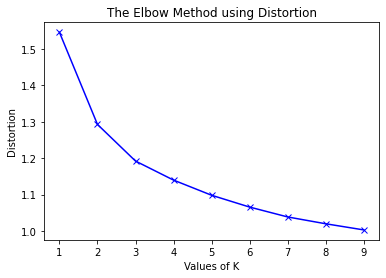

In [47]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [48]:
!pip install yellowbrick==1.3 -q


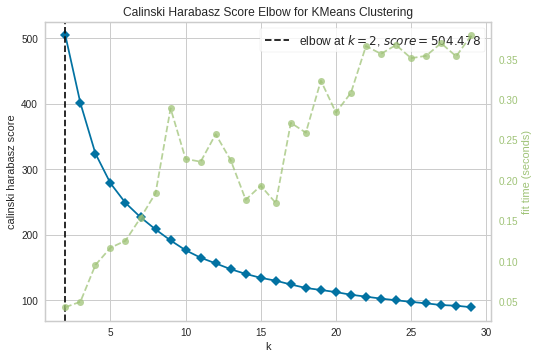

In [51]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(principalDf)        # Fit the data to the visualizer
visualizer.show()      # Finalize and render the figure

In [94]:
visualizer.poof()

In [93]:
%matplotlib inline


     |████████████████████████████████| 276kB 5.1MB/s 
     |████████████████████████████████| 14.8MB 192kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.2.0+cu92 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1
